In [100]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.color_palette("colorblind")
import matplotlib.pyplot as plt

import exploratory_data_analysis.eda_functions as eda

import scipy
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings as cuidado
cuidado.filterwarnings('ignore')

In [104]:
nb = pd.read_csv('nba-players.csv', index_col=0)
#nb.drop(['Unnamed: 0'], axis=1, inplace=True)
columns = pd.read_csv('nba_columnas.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [105]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1340 non-null   object 
 1   gp           1340 non-null   int64  
 2   min          1340 non-null   float64
 3   pts          1340 non-null   float64
 4   fgm          1340 non-null   float64
 5   fga          1340 non-null   float64
 6   fg           1340 non-null   float64
 7   3p_made      1340 non-null   float64
 8   3pa          1340 non-null   float64
 9   3p           1340 non-null   float64
 10  ftm          1340 non-null   float64
 11  fta          1340 non-null   float64
 12  ft           1340 non-null   float64
 13  oreb         1340 non-null   float64
 14  dreb         1340 non-null   float64
 15  reb          1340 non-null   float64
 16  ast          1340 non-null   float64
 17  stl          1340 non-null   float64
 18  blk          1340 non-null   float64
 19  tov   

In [106]:
nb.head()

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [107]:
## columns info 
columns

,column name,type,description
0,[None],int,Index
1,name,str,NBA player’s first and last name
2,gp,int,Number of games played (in one season)
3,min,int,Average number of minutes played per game
4,pts,int,Average number of points scored per game
5,fgm,int,Average number of field goals made per game
6,fga,int,Average number of field goals attempted
7,fg,int,Made Field goal percentage
8,3p_made,int,Average number of 3-point field goals per game
9,3pa,int,Average number of 3-point field goals attempte...


In [108]:
## Is there duplicated data?
not_duplicates = nb.shape == nb.drop_duplicates().shape
if not_duplicates == True:
    print('No Duplicates.')
else: print('Achtung Duplicated data!!!!')

Achtung Duplicated data!!!!


In [109]:
## Dropping duplicates

nb = nb.drop_duplicates()

In [110]:
not_duplicates = nb.shape == nb.drop_duplicates().shape
if not_duplicates == True:
    print('No Duplicates.')
else: print('Achtung Duplicated data!!!!')

No Duplicates.


In [111]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1328 non-null   object 
 1   gp           1328 non-null   int64  
 2   min          1328 non-null   float64
 3   pts          1328 non-null   float64
 4   fgm          1328 non-null   float64
 5   fga          1328 non-null   float64
 6   fg           1328 non-null   float64
 7   3p_made      1328 non-null   float64
 8   3pa          1328 non-null   float64
 9   3p           1328 non-null   float64
 10  ftm          1328 non-null   float64
 11  fta          1328 non-null   float64
 12  ft           1328 non-null   float64
 13  oreb         1328 non-null   float64
 14  dreb         1328 non-null   float64
 15  reb          1328 non-null   float64
 16  ast          1328 non-null   float64
 17  stl          1328 non-null   float64
 18  blk          1328 non-null   float64
 19  tov   

In [112]:
nb.describe()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.00000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,60.411145,17.634413,6.804217,2.630271,5.885542,44.184639,0.247741,0.77869,19.177485,1.298117,1.822139,70.325226,1.009714,2.027636,3.036446,1.551205,0.619051,0.368675,1.193599,0.620482
std,17.416688,8.322560,4.361669,1.684918,3.595394,6.132759,0.384548,1.06351,16.071943,0.987329,1.322653,10.562158,0.777551,1.362236,2.060241,1.475731,0.410972,0.429680,0.723966,0.485450
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.00000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.30000,22.200000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.12500,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.50000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [91]:
eda.get_invalid_values(nb)

,nulls,invalids,unique_item
name,0,0,"[Brandon Ingram, Andrew Harrison, JaKarr Samps..."
gp,0,0,"[36, 35, 74, 58, 48, 75, 62, 65, 42, 40, 27, 4..."
min,0,0,"[27.4, 26.9, 15.3, 11.6, 11.5, 11.4, 10.9, 10...."
pts,0,0,"[7.4, 7.2, 5.2, 5.7, 4.5, 3.7, 6.6, 2.4, 2.3, ..."
fgm,0,0,"[2.6, 2.0, 2.3, 1.6, 1.5, 2.5, 1.0, 1.4, 0.9, ..."
fga,0,0,"[7.6, 6.7, 4.7, 5.5, 3.0, 3.5, 5.8, 5.4, 2.4, ..."
fg,0,0,"[34.7, 29.6, 42.2, 42.6, 52.4, 42.3, 43.5, 41...."
3p_made,0,0,"[0.5, 0.7, 0.4, 0.1, 0.0, 0.3, 1.1, 0.2, 0.6, ..."
3pa,0,0,"[2.1, 2.8, 1.7, 0.5, 0.1, 1.1, 1.5, 0.3, 0.6, ..."
3p,0,0,"[25.0, 23.5, 24.4, 22.6, 0.0, 32.5, 50.0, 30.0..."


VALUE COUNTS
1    824
0    504
Name: target_5yrs, dtype: int64
1    62.048193
0    37.951807
Name: target_5yrs, dtype: float64


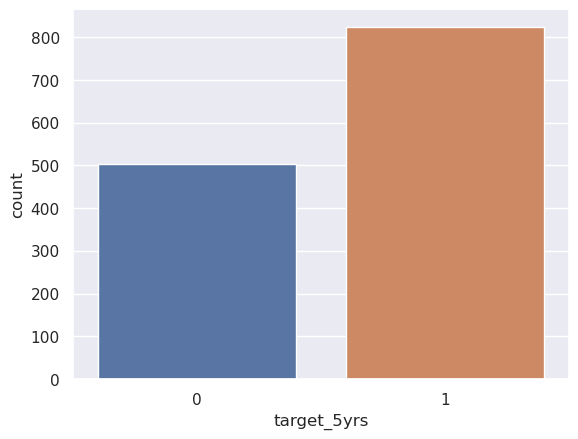

In [115]:
## 
sns.countplot(data=nb, x='target_5yrs');
print('VALUE COUNTS')
print(nb['target_5yrs'].value_counts())
print(nb['target_5yrs'].value_counts(normalize=True)*100)

## Notes
the data set is not balance neither too unbalance.
it is on the acceptable level.
85% and up needs consideration.

In [93]:
nb.corr()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
gp,1.000000,0.593167,0.540905,0.545494,0.520789,0.292795,0.110663,0.102513,0.040574,0.482917,0.480476,0.193224,0.402288,0.467061,0.461037,0.372731,0.453025,0.278056,0.520007,0.403239
min,0.593167,1.000000,0.911677,0.902919,0.910359,0.203449,0.392131,0.405821,0.170254,0.791051,0.779740,0.239926,0.571535,0.745238,0.709097,0.630249,0.756882,0.396958,0.826285,0.319873
pts,0.540905,0.911677,1.000000,0.990832,0.980093,0.254506,0.349710,0.360106,0.158075,0.896445,0.880907,0.258934,0.572909,0.693072,0.675566,0.553965,0.675228,0.384142,0.850336,0.316692
fgm,0.545494,0.902919,0.990832,1.000000,0.980261,0.291199,0.291823,0.302116,0.125477,0.848194,0.840668,0.223543,0.594507,0.702586,0.690016,0.534201,0.662610,0.395549,0.834326,0.318181
fga,0.520789,0.910359,0.980093,0.980261,1.000000,0.130166,0.392572,0.415887,0.203418,0.827800,0.806868,0.269749,0.502101,0.640124,0.613646,0.591678,0.690415,0.319744,0.846094,0.292736
fg,0.292795,0.203449,0.254506,0.291199,0.130166,1.000000,-0.291877,-0.347626,-0.333324,0.243288,0.297511,-0.161874,0.510577,0.408537,0.463834,-0.109304,0.056153,0.391380,0.120762,0.230963
3p_made,0.110663,0.392131,0.349710,0.291823,0.392572,-0.291877,1.000000,0.982674,0.590262,0.162216,0.099188,0.316549,-0.217944,0.018396,-0.070778,0.377226,0.308139,-0.157545,0.259140,0.037386
3pa,0.102513,0.405821,0.360106,0.302116,0.415887,-0.347626,0.982674,1.000000,0.583226,0.177923,0.112859,0.325749,-0.230754,0.013562,-0.078849,0.411242,0.340311,-0.171070,0.284726,0.018770
3p,0.040574,0.170254,0.158075,0.125477,0.203418,-0.333324,0.590262,0.583226,1.000000,0.040469,-0.022729,0.333757,-0.287738,-0.123366,-0.190810,0.267728,0.199704,-0.244984,0.113062,-0.000787
ftm,0.482917,0.791051,0.896445,0.848194,0.827800,0.243288,0.162216,0.177923,0.040469,1.000000,0.980445,0.257335,0.582206,0.652695,0.652551,0.478048,0.600088,0.403833,0.805925,0.298180


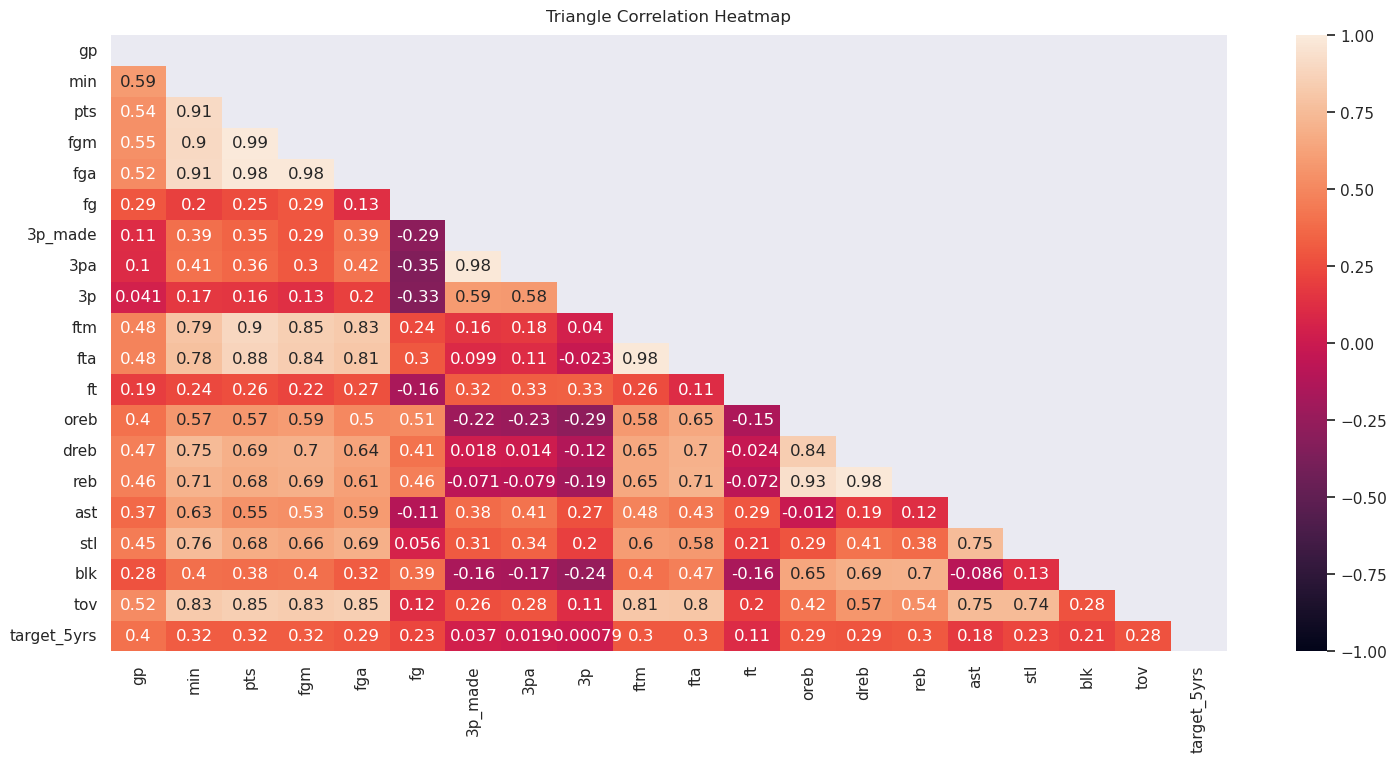

In [96]:
plt.figure(figsize=(18, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(nb.corr(), dtype=np.bool))
heatmap = sns.heatmap(nb.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':12}, pad=10);

**Question:** Which columns would you select and avoid selecting as features, and why? Keep in mind the goal is to identify features that will serve as useful predictors for the target variable, `target_5yrs`.  

- You should avoid selecting the `name` column as a feature. A player's name is not helpful in determining their career duration. Moreover, it may not be ethical or fair to predict a player's career duration based on a name.
- The number of games a player has played in may not be as important in determining their career duration as the number of points they have earned. While you could say that someone who has played in more games may have more practice and experience, the points they earn during the games they played in would speak more to their performance as a player. This, in turn, would influence their career duration. So, the `gp` column on its own may not be a helpful feature. However, `gp` and `pts` could be combined to get the total number of points earned across the games played, and that result could be a helpful feature. That approach can be implemented later in the feature engineering process—in feature extraction. 
- If the number of points earned across games will be extracted as a feature, then that could be combined with the number of minutes played across games (`min`) to extract another feature. This could be a measure of players' efficiency and could help in predicting players' career duration. `min` on its own may not be useful as a feature for the same reason as `gp`.
- There are three different columns that give information about field goals. The percent of field goals a player makes (`fg`) says more about their performance than the number of field goals they make (`fgm`) or the number of field goals they attempt (`fga`). The percent gives more context, as it takes into account both how many field goals a player successfully made and how many field goals they attempted in total. This allows for a more meaningful comparison between players. The same logic applies to the percent of three-point field goals made, as well as the percent of free throws made. 
- There are columns for the number offensive rebounds (`oreb`), the number of defensive rebounds (`dreb`), and the number of rebounds overall (`reb`). Because the overall number of rebounds should already incorporate both offensive and defensive rebounds, it would make sense to use the overall as a feature. 
- The number of assists (`ast`), steals (`stl`), blocks (`blk`), and turnovers (`tov`) also provide information about how well players are performing in games, and thus, could be helpful in predicting how long players last in the league. 

Therefore, at this stage of the feature engineering process, it would be most effective to select the following columns: 

`gp`, `min`, `pts`, `fg`, `3p`, `ft`, `reb`, `ast`, `stl`, `blk`, `tov`.

In [119]:
selection = ['gp', 'min', 'pts', 'fg', '3p',
       'ft','reb', 'ast', 'stl', 'blk', 'tov']

In [125]:
sel = nb[selection]
y = nb['target_5yrs']

**Question:** Which columns would you select and avoid selecting as features, and why? Keep in mind the goal is to identify features that will serve as useful predictors for the target variable, `target_5yrs`.  

- You should avoid selecting the `name` column as a feature. A player's name is not helpful in determining their career duration. Moreover, it may not be ethical or fair to predict a player's career duration based on a name.
- The number of games a player has played in may not be as important in determining their career duration as the number of points they have earned. While you could say that someone who has played in more games may have more practice and experience, the points they earn during the games they played in would speak more to their performance as a player. This, in turn, would influence their career duration. So, the `gp` column on its own may not be a helpful feature. However, `gp` and `pts` could be combined to get the total number of points earned across the games played, and that result could be a helpful feature. That approach can be implemented later in the feature engineering process—in feature extraction. 
- If the number of points earned across games will be extracted as a feature, then that could be combined with the number of minutes played across games (`min`) to extract another feature. This could be a measure of players' efficiency and could help in predicting players' career duration. `min` on its own may not be useful as a feature for the same reason as `gp`.
- There are three different columns that give information about field goals. The percent of field goals a player makes (`fg`) says more about their performance than the number of field goals they make (`fgm`) or the number of field goals they attempt (`fga`). The percent gives more context, as it takes into account both how many field goals a player successfully made and how many field goals they attempted in total. This allows for a more meaningful comparison between players. The same logic applies to the percent of three-point field goals made, as well as the percent of free throws made. 
- There are columns for the number offensive rebounds (`oreb`), the number of defensive rebounds (`dreb`), and the number of rebounds overall (`reb`). Because the overall number of rebounds should already incorporate both offensive and defensive rebounds, it would make sense to use the overall as a feature. 
- The number of assists (`ast`), steals (`stl`), blocks (`blk`), and turnovers (`tov`) also provide information about how well players are performing in games, and thus, could be helpful in predicting how long players last in the league. 

Therefore, at this stage of the feature engineering process, it would be most effective to select the following columns: 

`gp`, `min`, `pts`, `fg`, `3p`, `ft`, `reb`, `ast`, `stl`, `blk`, `tov`.

In [128]:
## Extracting more info
# Make a copy of `selected_data` 
extracted_data = sel.copy()

# Add a new column named `total_points`; 
# Calculate total points earned by multiplying the number of games played by the average number of points earned per game
extracted_data["total_points"] = extracted_data["gp"] * extracted_data["pts"]

# Add a new column named `efficiency`. Calculate efficiency by dividing the total points earned by the total number of minutes played, which yields points per minute
extracted_data["efficiency"] = extracted_data["total_points"] / extracted_data["min"]

# Display the first few rows of `extracted_data` to confirm that the new columns were added.
extracted_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,9.722628
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,9.368030
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,25.150327
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,28.500000
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,18.782609


In [129]:
## droping the redundant info
extracted_data.drop(columns=["gp", "pts", "min"], inplace=True)

In [130]:
## Saving data
extracted_data.to_csv("extracted_nba_players_data.csv", index=0)